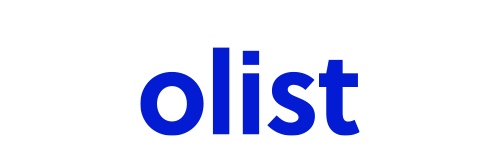

# Project description
This is a project based on Olist dataset. Olist is a store that insert small entrepreneurs on big brazilian e-commerces and its revenue comes from a percentage on each transaction of its sellers.<br><br>
This project will be divided in the following steps:<br>
- 1 Business problem<br>
- 2 Baseline definition<br>
- 3 Solution planning<br>
- 4 Collect data<br>
- 5 Exploratory data analysis<br>
- 6 Data preparation (for Machine Learning models)<br>
- 7 ML model trainning<br>
- 8 ML model performance analysis<br>
- 9 Coneversion of Machine Learning metrics into business metrics<br>
- 10 Publication of the solution<br>
- 11 Storytelling of the process and results<br>

# 1: Business problem
In this project i want to figure out if there is a big loss of sellers through time and the necessity of retention programs. If the answer is Yes, i will make a study to understand what variables impact more on sellers leaving and with this answer, make a predictive model to indicate what sellers has more probability to stop selling with Olist.

# 2: Baseline definition
Starting from the point that "stop selling" is being 90 days without any sell, a baseline to this business problem could be a simple choose of the sellers near of 90 days without selling, those who has more than 60 days for an exemple.

# 3: Solution planning
It will be used Microsoft Azure products (like Azure Data Lake Storage, Data Factory and Databricks) to make the data engineering for this project, besides Streamlit to show graphically the solution, python for all project and Pycaret to select the best Machine Learning model and to export the model's file that will be used on Streamlit to generate the predictions.

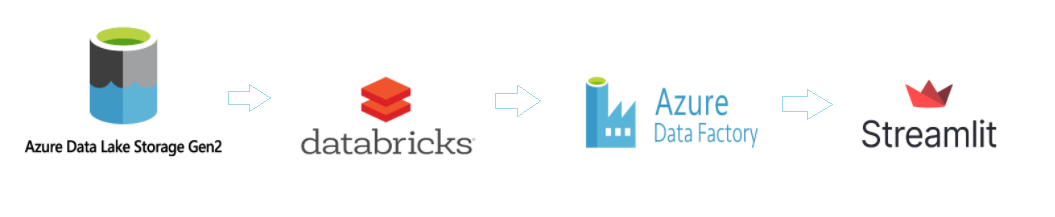

# 4: Collect data

Before we collect the data from azure datalake its important to mention <b>how i created the analytical base table.</b><br>
The Olist dataset is formed by 8 tables. I uploaded this 8 tables into my local Azure Data Studio to generate a query that returns 20 features of each seller. Below you can see the original tables:

In [29]:
#Imports
import numpy as np
import pandas as pd
import pyodbc
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from operator import attrgetter
from plotly.offline import plot, iplot
%matplotlib inline
import acessando_blob_storage as abs #python file created to access the datalake

In [5]:
#conexao
def conexao_sql_server():
    server = 'LAPTOP-TA7HV3O7\SQLEXPRESS'
    database = 'olist'
    username = 'sa'
    password = 'XXX'
    string_conexao = 'Driver={SQL Server Native Client 11.0};Server='+server+';Database='+database+';UID='+username+';PWD='+password
    conexao = pyodbc.connect(string_conexao)
    return conexao

#conexao
conn = conexao_sql_server()

query1 = '''select top 10 * from olist_order_items_dataset'''
query2 = '''select top 10 * from olist_customers_dataset'''
query3 = '''select top 10 * from olist_geolocation_dataset'''
query4 = '''select top 10 * from olist_order_payments_dataset'''
query5 = '''select top 10 * from olist_order_reviews_dataset'''
query6 = '''select top 10 * from olist_orders_dataset'''
query7 = '''select top 10 * from olist_products_dataset'''
query8 = '''select top 10 * from olist_sellers_dataset'''

table1 = pd.read_sql(query1, conn)
table2 = pd.read_sql(query2, conn)
table3 = pd.read_sql(query3, conn)
table4 = pd.read_sql(query4, conn)
table5 = pd.read_sql(query5, conn)
table6 = pd.read_sql(query6, conn)
table7 = pd.read_sql(query7, conn)
table8 = pd.read_sql(query8, conn)

In [3]:
table1.head()

,"""order_id""","""order_item_id""","""product_id""","""seller_id""","""shipping_limit_date""","""price""","""freight_value"""
0,"""00010242fe8c5a6d1ba2dd792cb16214""",1,"""4244733e06e7ecb4970a6e2683c13e61""","""48436dade18ac8b2bce089ec2a041202""",2017-09-19 09:45:35,58.90,13.29
1,"""00018f77f2f0320c557190d7a144bdd3""",1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,"""000229ec398224ef6ca0657da4fc703e""",1,c777355d18b72b67abbeef9df44fd0fd,"""5b51032eddd242adc84c38acab88f23d""",2018-01-18 14:48:30,199.00,17.87
3,"""00024acbcdf0a6daa1e931b038114c75""",1,"""7634da152a4610f1595efa32f14722fc""","""9d7a1d34a5052409006425275ba1c2b4""",2018-08-15 10:10:18,12.99,12.79
4,"""00042b26cf59d7ce69dfabb4e55b4fd9""",1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
table2.head()

,"""customer_id""","""customer_unique_id""","""customer_zip_code_prefix""","""customer_city""","""customer_state"""
0,"""06278b75c68ad852923f6ef0773eb154""","""51254e30e483306de104997755d19537""","""22461""",rio de janeiro,RJ
1,"""8e64ee8a8087e2105aacb3eb1611242b""",b84cb3aaddc8ae670fb5935cfef5fa26,"""53140""",olinda,PE
2,"""2b91c0e00db628c7f3f8f581ebd9c4e6""",bec46d4f7dbf57b38055df36befed4e2,"""27580""",itatiaia,RJ
3,"""680043a09260a212d1dec021dd1efadc""",f2fa99f89acf8b2c2f63775d218def26,"""68193""",novo progresso,PA
4,"""7113efb0ff417de3c22fc3dec35f5b3c""",f2bd7baf91b52d05cb2a572f19bc9b1b,"""06663""",itapevi,SP


In [5]:
table3.head()

,"""geolocation_zip_code_prefix""","""geolocation_lat""","""geolocation_lng""","""geolocation_city""","""geolocation_state"""
0,"""01319""",-23.551666072162263,-46.6416210910324,sÃ£o paulo,SP
1,"""01323""",-23.56640335729583,-46.64203684477313,sao paulo,SP
2,"""01323""",-23.570092205256334,-46.64201953307684,sÃ£o paulo,SP
3,"""01311""",-23.558602661953913,-46.65986150236593,sao paulo,SP
4,"""01307""",-23.549079834583633,-46.65429504454956,sao paulo,SP


In [6]:
table4.head()

,"""order_id""","""payment_sequential""","""payment_type""","""payment_installments""","""payment_value"""
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,"""25e8ea4e93396b6fa0d3dd708e76c1bd""",1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,"""42fdf880ba16b47b59251dd489d4441a""",1,credit_card,2,128.45


In [7]:
table5.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [8]:
table6.head()

,"""order_id""","""customer_id""","""order_status""","""order_purchase_timestamp""","""order_approved_at""","""order_delivered_carrier_date""","""order_delivered_customer_date""","""order_estimated_delivery_date"""
0,e481f51cbdc54678b7cc49136f2d6af7,"""9ef432eb6251297304e76186b10a928d""",delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,"""53cdb2fc8bc7dce0b6741e2150273451""",b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,"""47770eb9100c2d0c44946d9cf07ec65d""","""41ce2a54c0b03bf3443c3d931a367089""",delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,"""949d5b44dbf5de918fe9c16f97b45f8a""",f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,"""8ab97904e6daea8866dbdbc4fb7aad2c""",delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
table7.head()

,"""product_id""","""product_category_name""","""product_name_lenght""","""product_description_lenght""","""product_photos_qty""","""product_weight_g""","""product_length_cm""","""product_height_cm""","""product_width_cm"""
0,"""1e9e8ef04dbcff4541ed26657ea517e5""",perfumaria,40,287,1,225,16,10,14
1,"""3aa071139cb16b67ca9e5dea641aaa2f""",artes,44,276,1,1000,30,18,20
2,"""96bd76ec8810374ed1b65e291975717f""",esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,"""9dc1a7de274444849c219cff195d0b71""",utilidades_domesticas,37,402,4,625,20,17,13


In [10]:
table8.head()

,"""seller_id""","""seller_zip_code_prefix""","""seller_city""","""seller_state"""
0,"""3442f8959a84dea7ee197c632cb2df15""","""13023""",campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,"""13844""",mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,"""20031""",rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,"""04195""",sao paulo,SP
4,"""51a04a8a6bdcb23deccc82b0b80742cf""","""12914""",braganca paulista,SP


From this 8 tables, i created the following query to provide the 20 features about the sellers:

In [14]:
abt = '''
select 
    tb2.["seller_id"] as [id_vendedor],
    max(tb1.["order_purchase_timestamp"]) as [data_pedido],
    tb4.["seller_state"] as [estado],
    (datediff(day, min(tb1.["order_approved_at"]), '2018-09-03')+1) as [dias_na_base],
    (datediff(day, min(tb1.["order_approved_at"]), max(tb1.["order_approved_at"]))+1) as [dias_atividade],
    count(distinct(cast(tb1.["order_approved_at"] as date))) as [datas_distintas_de_venda],
    cast(count(distinct(cast(tb1.["order_approved_at"] as date))) as numeric) / (datediff(day, min(tb1.["order_approved_at"]), max(tb1.["order_approved_at"]))+1) as [%_de_atividade],
    cast(count(distinct(tb2.["order_id"])) as numeric) / count(distinct(cast(tb1.["order_approved_at"] as date))) as [vendas_por_dia_de_atividade],
    avg(cast(tb3.[review_score] as numeric)) as [avaliacao_media],
    count(distinct(tb2.["order_id"])) as [qtd_pedidos],
    count(tb2.["product_id"]) as [qtd_produtos],
    cast(count(tb2.["product_id"]) as numeric) / count(distinct(tb2.["order_id"])) as [media_produtos_por_pedido],
    sum(cast(tb2.["price"] as numeric)) as [receita_total],
    sum(cast(tb2.["price"] as numeric)) / count(distinct(tb2.["order_id"])) as  [media_valor_pedido_sem_frete],
    (sum(cast(tb2.["price"] as numeric)) + sum(cast(tb2.["freight_value"] as numeric))) / count(distinct(tb2.["order_id"])) as  [media_valor_pedido_com_frete],
    sum(cast(tb2.["freight_value"] as numeric)) / count(distinct(tb2.["order_id"])) as  [media_valor_frete],
    (convert(decimal(5,1),sum(case when tb1.["order_delivered_customer_date"] > tb1.["order_estimated_delivery_date"] then 1 else 0 end)))/count(tb2.["seller_id"]) as [prop_pedidos_atrasados],
    datediff(day, max(tb1.["order_approved_at"]), '2018-09-03') as [dias_sem_vender],
    avg(datediff(day, (tb1.["order_delivered_carrier_date"]), tb2.["shipping_limit_date"])) as [tempo_de_postagem]
    from olist_orders_dataset tb1

    left join olist_order_items_dataset tb2 
    on tb1.["order_id"] = tb2.["order_id"] 

    left join olist_order_reviews_dataset tb3
    on tb1.["order_id"] = tb3.[order_id]
    
    left join olist_sellers_dataset tb4
    on tb2.["seller_id"] = tb4.["seller_id"]
    
    where tb1.["order_status"] = 'delivered' and tb1.["order_approved_at"] NOT LIKE ''
    group by tb2.["seller_id"], tb4.["seller_state"]
    HAVING (datediff(day, min(tb1.["order_approved_at"]), '2018-09-03')+1) > 90
'''   

vendedores = pd.read_sql(abt, conn)

In [15]:
vendedores.head()

,id_vendedor,data_pedido,estado,dias_na_base,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
0,c89cf7c468a48af70aada384e722f9e2,2018-08-06 14:31:24,RJ,454,426,14,0.032864,1.00000,4.000000,14,14,1.000000,745.0,53.214285,69.428571,16.214285,0.071429,28,2
1,d50d79cb34e38265a8649c383dcffd48,2018-08-10 10:56:10,SP,696,672,64,0.095238,1.09375,4.086956,70,70,1.000000,13013.0,185.900000,213.528571,27.628571,0.071429,24,4
2,ef990a83bbea832f36ebe81376335aa8,2018-08-12 18:43:51,SC,281,259,32,0.123552,1.34375,4.000000,43,44,1.023256,4646.0,108.046511,129.232558,21.186046,0.250000,22,3
3,"""4c8545742faaf58fafd5fd14d25d75cf""",2018-05-19 18:08:37,SP,173,66,4,0.060606,1.00000,NaN,4,4,1.000000,3020.0,755.000000,804.000000,49.000000,0.000000,107,4
4,"""165fc07beebdcb6190fba8a06db2a449""",2018-08-14 17:42:23,PR,392,372,47,0.126344,1.06383,3.500000,50,64,1.280000,17484.0,349.680000,381.660000,31.980000,0.125000,20,2


Below are some data processing

In [16]:
#rounding float64 columns
float_columns = list(vendedores.select_dtypes(include='float64').columns)
vendedores[float_columns] = np.round(vendedores[float_columns], decimals = 2)

#input average from 1 to 5 for sellers without rating
vendedores['avaliacao_media'] = vendedores['avaliacao_media'].fillna(2.5)

#creating labels for sellers with more than 90 days without selling
vendedores['target'] = (vendedores['dias_sem_vender'] > 90)

#replacing values to 0 and 1
vendedores.loc[:, 'target'].replace({False: 0}, inplace=True)
vendedores.loc[:, 'target'].replace({True: 1}, inplace=True)

#get just the date 
vendedores['data_pedido'] = [i[0:11] for i in vendedores['data_pedido']]
#transforming into datetime
vendedores['data_pedido'] = pd.to_datetime(vendedores['data_pedido'])

In [17]:
vendedores.head()

,id_vendedor,data_pedido,estado,dias_na_base,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem,target
0,c89cf7c468a48af70aada384e722f9e2,2018-08-06,RJ,454,426,14,0.03,1.00,4.00,14,14,1.00,745.0,53.21,69.43,16.21,0.07,28,2,0
1,d50d79cb34e38265a8649c383dcffd48,2018-08-10,SP,696,672,64,0.10,1.09,4.09,70,70,1.00,13013.0,185.90,213.53,27.63,0.07,24,4,0
2,ef990a83bbea832f36ebe81376335aa8,2018-08-12,SC,281,259,32,0.12,1.34,4.00,43,44,1.02,4646.0,108.05,129.23,21.19,0.25,22,3,0
3,"""4c8545742faaf58fafd5fd14d25d75cf""",2018-05-19,SP,173,66,4,0.06,1.00,2.50,4,4,1.00,3020.0,755.00,804.00,49.00,0.00,107,4,1
4,"""165fc07beebdcb6190fba8a06db2a449""",2018-08-14,PR,392,372,47,0.13,1.06,3.50,50,64,1.28,17484.0,349.68,381.66,31.98,0.12,20,2,0


This analytical base table were exported to Azure datalake where we can access and use this data to make predictions and other jobs. Below is the code to download a file from the datalake

In [ ]:
abs.download_blob('presentation', 'tb_base.csv', 'tb_base.csv') #download the database from datalake

# 5 Exploratory Data Analysis

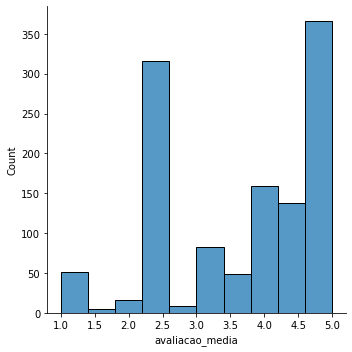

In [23]:
#checking ratings distribution of sellers who are more than 90 days without selling
left = vendedores.loc[vendedores['target']==1]
sns.displot(left['avaliacao_media'], bins=10)

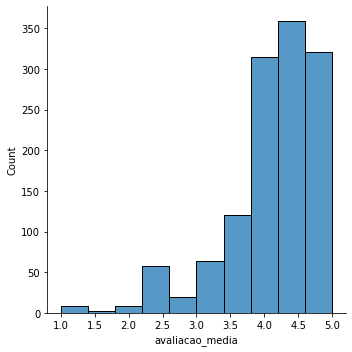

In [24]:
#checking ratings distribution of sellers who are more than 90 days without selling
not_left = vendedores.loc[vendedores['target']==0]
sns.displot(not_left['avaliacao_media'], bins=10)

Here we can see that as expected, the sellers who left olist have worst rating 

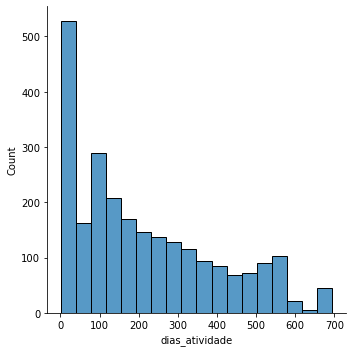

In [27]:
#distribution of active days of the sellers (difference by the first sell date and the last)
sns.displot(vendedores, x="dias_atividade")

Most of the sellers has less than 50 days of activity

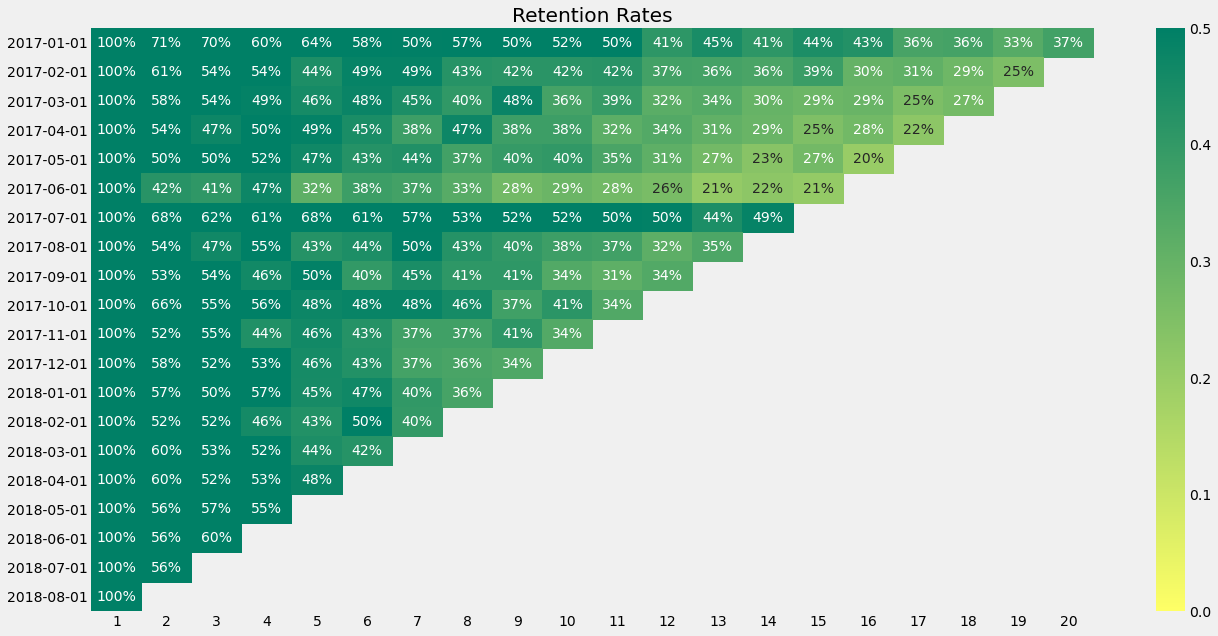

In [30]:
query3 = '''
select 
tb1.["order_id"] as [order_id],
tb1.["order_purchase_timestamp"] as [order_purchase_timestamp],
cast(["price"] as float) + cast(["freight_value"] as float) as [total_pago],
tb2.["seller_id"] as [seller_id]
from [olist_orders_dataset] tb1
full OUTER join [olist_order_items_dataset] tb2
on tb1.["order_id"] = tb2.["order_id"]
'''

#read query
vendas = pd.read_sql(query3, conn)

#transforming into datetime
vendas['order_purchase_timestamp'] = pd.to_datetime(vendas['order_purchase_timestamp'])

#get month
vendas['order_months'] = vendas['order_purchase_timestamp'].dt.to_period('M') #Criar coluna Ano/Mês

#get the first sell grouping by seller and month
vendas['cohorts'] = vendas.groupby('seller_id')['order_months'].transform('min') #Criar campo com primeiro mês de venda

#dataframe to get sells, amount paid and unique orders by unique seller
cohorts_data = vendas.reset_index()\
                     .groupby(['cohorts', 'order_months'])\
                     .agg(SellerCount = ('seller_id', 'nunique'),
                          Revenue = ('total_pago', 'sum'),
                          Orders = ('order_id', 'nunique'))\
                     .reset_index()

#periods where the seller keeps selling
cohorts_data['periods'] = (cohorts_data.order_months - cohorts_data.cohorts).apply(attrgetter('n')) 

#droping the first days of a incomplete year
cohorts_data.drop(cohorts_data.head(45).index, inplace=True)

#droping last month off database which is also incomplete
cohorts_data.drop(cohorts_data.loc[cohorts_data['order_months']=='2018-09'].index, inplace=True)

#transforming into string
cohorts_data['cohorts'] = cohorts_data['cohorts'].astype(str)
#transforming again into datetime
cohorts_data['cohorts'] = pd.to_datetime(cohorts_data['cohorts'])
cohorts_data['order_months'] = cohorts_data['order_months'].astype(str)
cohorts_data['order_months'] = pd.to_datetime(cohorts_data['order_months'])

#function to get month and year
def get_month(x): return dt.datetime(x.year, x.month, 1)

#applying function
vendas['SalesMonth'] = vendas['order_purchase_timestamp'].apply(get_month)

#grouping values
grouping = vendas.groupby('seller_id')['SalesMonth']
#get min sales month value
vendas['CohortMonth'] = grouping.transform('min')

#function to get date parts
def get_date_int(vendas, column):
    year = vendas[column].dt.year
    month = vendas[column].dt.month
    day = vendas[column].dt.day
    return year, month, day

#get date of sales
sale_year, sale_month, sale_day = get_date_int(vendas, 'SalesMonth')

#get date of period that sellers stop selling
cohort_year, cohort_month, cohort_day = get_date_int(vendas, 'CohortMonth')

#difference of years
years_diff = sale_year - cohort_year

#difference of months
months_diff = sale_month - cohort_month

#get index
vendas['CohortIndex'] = years_diff * 12 + months_diff + 1

#grouping 
grouping = vendas.groupby(['CohortMonth', 'CohortIndex'])

#get unique sellers
cohort_data = grouping['seller_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

#count values
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='seller_id')


cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date


#sns.set()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r')
plt.show()

# 6 Data preparation

# 7 Machine Learning model trainning

# 8 Machine Learning model performance

# 9 Conversion of ML performance to business perfomance

# 10 Model's publication in production environment

# 11 Storytelling of the proccess and results

In [ ]:
#imports
import datetime as dt
import pandas as pd
import pyodbc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import plotly
import plotly.express as px
import cufflinks as cf
import joblib
from plotly.offline import plot, iplot
%matplotlib inline
plt.figure(figsize=(6, 12))

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from pycaret.classification import *